## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [146]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

survey = pd.read_csv('./사교육비조사.csv',encoding='EUC-KR')
survey.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [147]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [148]:
survey.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [149]:
survey=survey[survey['학교급구분코드']==3]
survey

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,3,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,3,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,4,39,3,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


In [150]:
survey.count()

지역구분코드          30052
행정구역시도코드        30052
학교급구분코드         30052
방과후학교참여여부       30052
방과후학교참여시간수      30052
EBS교재비          30052
사교육참여시간수        30052
일반교과사교육시간수      30052
예체능사교육시간수       30052
사교육비총비용         30052
총자녀수            30052
학생성적구분코드        30052
부_교육정도코드        28483
모_교육정도코드        29074
부모경제활동코드        29947
월평균가구소득코드       30052
진학희망고등학교유형코드        0
dtype: int64

In [151]:
survey = survey.drop(['학교급구분코드'], axis=1)
survey.head(10)

,지역구분코드,행정구역시도코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,1,0.333333,0.0,0.000000,0.000000,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,1,0.333333,0.0,0.000000,0.000000,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,1,0.333333,0.0,0.000000,0.000000,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,1,0.333333,0.0,0.000000,0.000000,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,1,0.333333,0.0,12.000000,12.000000,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
4925,1,11,1,0.333333,0.0,13.333333,13.333333,0.0,2518.166232,2,4.0,51.0,51.0,3.0,5,NaN
4926,1,11,1,0.333333,0.0,13.333333,13.333333,0.0,871.635714,2,1.0,71.0,51.0,1.0,7,NaN
4927,1,11,1,0.333333,0.0,15.333333,15.333333,0.0,1782.891233,2,1.0,51.0,51.0,1.0,8,NaN
4928,1,11,1,0.333333,0.0,16.000000,16.000000,0.0,1203.998230,2,2.0,51.0,51.0,1.0,8,NaN
4929,1,11,1,0.333333,0.0,22.000000,22.000000,0.0,967.920146,1,3.0,NaN,41.0,2.0,8,NaN


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [152]:
survey = survey.drop(['지역구분코드','행정구역시도코드'], axis=1)
survey.head(10)

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,0.333333,0.0,0.000000,0.000000,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,0.333333,0.0,0.000000,0.000000,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,0.333333,0.0,0.000000,0.000000,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,0.333333,0.0,0.000000,0.000000,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,0.333333,0.0,12.000000,12.000000,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
4925,1,0.333333,0.0,13.333333,13.333333,0.0,2518.166232,2,4.0,51.0,51.0,3.0,5,NaN
4926,1,0.333333,0.0,13.333333,13.333333,0.0,871.635714,2,1.0,71.0,51.0,1.0,7,NaN
4927,1,0.333333,0.0,15.333333,15.333333,0.0,1782.891233,2,1.0,51.0,51.0,1.0,8,NaN
4928,1,0.333333,0.0,16.000000,16.000000,0.0,1203.998230,2,2.0,51.0,51.0,1.0,8,NaN
4929,1,0.333333,0.0,22.000000,22.000000,0.0,967.920146,1,3.0,NaN,41.0,2.0,8,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [153]:
survey['방과후학교참여여부'].value_counts()

1    18498
2    11554
Name: 방과후학교참여여부, dtype: int64

In [154]:
survey=pd.get_dummies(survey, columns=['방과후학교참여여부'])
survey

,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여여부_1,방과후학교참여여부_2
4920,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1
75679,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1
75680,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1
75681,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1


In [155]:
survey=survey.rename(columns={'방과후학교참여여부_1':'참여','방과후학교참여여부_2':'미참여'})
survey

,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1
75679,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1
75680,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1
75681,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [156]:
survey['EBS교재비'].value_counts()

0.000000     18123
19.684315      674
39.652013      554
11.810589      535
19.826006      529
             ...  
62.202436        1
79.700546        1
68.107730        1
50.785533        1
59.840318        1
Name: EBS교재비, Length: 309, dtype: int64

In [157]:
survey = survey.drop(['EBS교재비'], axis=1)
survey.head(10)

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,0.333333,0.000000,0.000000,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,0.333333,0.000000,0.000000,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,0.333333,0.000000,0.000000,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,0.333333,0.000000,0.000000,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,0.333333,12.000000,12.000000,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0
4925,0.333333,13.333333,13.333333,0.0,2518.166232,2,4.0,51.0,51.0,3.0,5,NaN,1,0
4926,0.333333,13.333333,13.333333,0.0,871.635714,2,1.0,71.0,51.0,1.0,7,NaN,1,0
4927,0.333333,15.333333,15.333333,0.0,1782.891233,2,1.0,51.0,51.0,1.0,8,NaN,1,0
4928,0.333333,16.000000,16.000000,0.0,1203.998230,2,2.0,51.0,51.0,1.0,8,NaN,1,0
4929,0.333333,22.000000,22.000000,0.0,967.920146,1,3.0,NaN,41.0,2.0,8,NaN,1,0


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

<AxesSubplot:xlabel='학생성적구분코드', ylabel='사교육비총비용'>

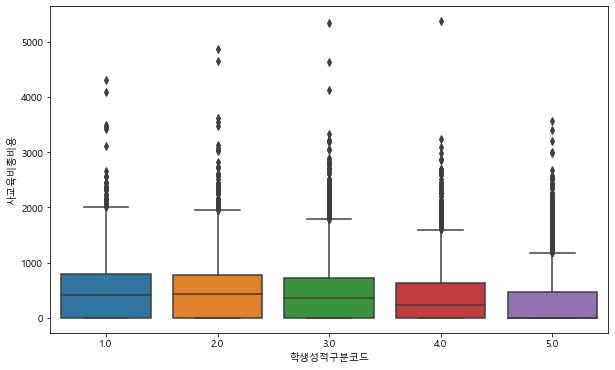

In [158]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.figure(figsize=(10, 6))

boxplot = sns.boxplot(data=survey, x='학생성적구분코드', y='사교육비총비용')
boxplot

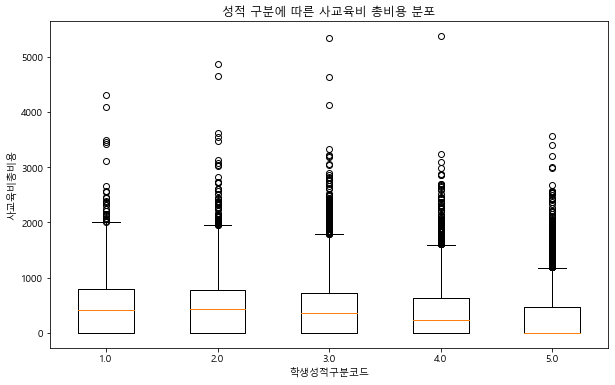

In [159]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(10, 6))
plt.title('성적 구분에 따른 사교육비 총비용 분포') 
plt.xlabel('학생성적구분코드') 
plt.ylabel('사교육비총비용') 

plt.boxplot([survey['사교육비총비용'][survey['학생성적구분코드'] == grade] for grade in sorted(survey['학생성적구분코드'].unique())],
            labels=sorted(survey['학생성적구분코드'].unique()))

plt.show()

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [160]:
survey['학생성적구분코드'].value_counts()

3.0    9032
2.0    6079
4.0    6020
5.0    5813
1.0    3108
Name: 학생성적구분코드, dtype: int64

In [161]:
def classify(grade):
    if grade in [1, 2]:
        return '상위'
    elif grade in [4, 5]:
        return '하위'
    else:
        return '중위'
    
survey['학생성적구분코드'] = survey['학생성적구분코드'].apply(classify)

In [162]:
survey=pd.get_dummies(survey, columns=['학생성적구분코드'])
survey

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,학생성적구분코드_상위,학생성적구분코드_중위,학생성적구분코드_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1,0,1,0,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,1,0,0,1,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,1,0,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,1,0,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,0,1,0,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,0,1,0,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,0,1,0,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,0,1,1,0,0


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A: 순서의 의미가 있을 때 label encoding을 사용하고 순서가 의미 없을 때 one hot encoding을 사용한다. 또한 변수의 개수가 많을 때는 label encoding이 효율적이다. 변수가 많아지면 one hot encoding의 dummy variable도 많아져 비효율적이다.

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [163]:
survey = survey.drop(['학생성적구분코드_상위'], axis=1)
survey.head(10)

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,학생성적구분코드_중위,학생성적구분코드_하위
4920,0.333333,0.000000,0.000000,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1,0,0,0
4921,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,1,0,1,0
4922,0.333333,0.000000,0.000000,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,1,0,0,1
4923,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,1,0,0,1
4924,0.333333,12.000000,12.000000,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,1,0,0,1
4925,0.333333,13.333333,13.333333,0.0,2518.166232,2,51.0,51.0,3.0,5,NaN,1,0,0,1
4926,0.333333,13.333333,13.333333,0.0,871.635714,2,71.0,51.0,1.0,7,NaN,1,0,0,0
4927,0.333333,15.333333,15.333333,0.0,1782.891233,2,51.0,51.0,1.0,8,NaN,1,0,0,0
4928,0.333333,16.000000,16.000000,0.0,1203.998230,2,51.0,51.0,1.0,8,NaN,1,0,0,0
4929,0.333333,22.000000,22.000000,0.0,967.920146,1,NaN,41.0,2.0,8,NaN,1,0,1,0


In [164]:
survey = survey.drop(['참여'], axis=1)
survey.head(10)

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,미참여,학생성적구분코드_중위,학생성적구분코드_하위
4920,0.333333,0.000000,0.000000,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,0,0,0
4921,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,0,1,0
4922,0.333333,0.000000,0.000000,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,0,0,1
4923,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,0,0,1
4924,0.333333,12.000000,12.000000,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,0,0,1
4925,0.333333,13.333333,13.333333,0.0,2518.166232,2,51.0,51.0,3.0,5,NaN,0,0,1
4926,0.333333,13.333333,13.333333,0.0,871.635714,2,71.0,51.0,1.0,7,NaN,0,0,0
4927,0.333333,15.333333,15.333333,0.0,1782.891233,2,51.0,51.0,1.0,8,NaN,0,0,0
4928,0.333333,16.000000,16.000000,0.0,1203.998230,2,51.0,51.0,1.0,8,NaN,0,0,0
4929,0.333333,22.000000,22.000000,0.0,967.920146,1,NaN,41.0,2.0,8,NaN,0,1,0


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A: 다중공선성은 서로 다른 독립변수들 간에 강한 상관관계가 발생하는 것이다. 이러한 강한 상관관계는 분석 모델이 정확도를 저하시키고, 변수의 중요도나 영향력을 왜곡할 수 있다. 더미 변수 중 하나가 다른 변수들로부터 완벽하게 예측될 수 있기 때문에, 회귀모델에서는 해당 변수들의 계수를 정확하게 추정할 수 없게 된다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [165]:
columns=['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']
survey_1=survey[columns]
survey_corr=survey_1.corr()
survey_corr

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수
사교육참여시간수,1.000000,0.788419,0.514551
일반교과사교육시간수,0.788419,1.000000,-0.103757
예체능사교육시간수,0.514551,-0.103757,1.000000


<AxesSubplot:>

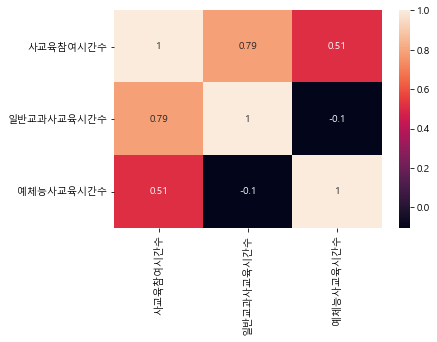

In [166]:
sns.heatmap(survey_corr, annot=True)

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [167]:
survey.isnull().sum()

방과후학교참여시간수          0
사교육참여시간수            0
일반교과사교육시간수          0
예체능사교육시간수           0
사교육비총비용             0
총자녀수                0
부_교육정도코드         1569
모_교육정도코드          978
부모경제활동코드          105
월평균가구소득코드           0
진학희망고등학교유형코드    30052
미참여                 0
학생성적구분코드_중위         0
학생성적구분코드_하위         0
dtype: int64

In [168]:
survey = survey.drop(['진학희망고등학교유형코드'], axis=1)
survey.head(10)

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,미참여,학생성적구분코드_중위,학생성적구분코드_하위
4920,0.333333,0.000000,0.000000,0.0,0.000000,1,71.0,61.0,2.0,4,0,0,0
4921,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,6,0,1,0
4922,0.333333,0.000000,0.000000,0.0,0.000000,2,31.0,41.0,3.0,4,0,0,1
4923,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,1,0,0,1
4924,0.333333,12.000000,12.000000,0.0,2203.395453,2,71.0,62.0,1.0,8,0,0,1
4925,0.333333,13.333333,13.333333,0.0,2518.166232,2,51.0,51.0,3.0,5,0,0,1
4926,0.333333,13.333333,13.333333,0.0,871.635714,2,71.0,51.0,1.0,7,0,0,0
4927,0.333333,15.333333,15.333333,0.0,1782.891233,2,51.0,51.0,1.0,8,0,0,0
4928,0.333333,16.000000,16.000000,0.0,1203.998230,2,51.0,51.0,1.0,8,0,0,0
4929,0.333333,22.000000,22.000000,0.0,967.920146,1,NaN,41.0,2.0,8,0,1,0


In [169]:
survey=survey.fillna(0) #결측값 0으로 대체
survey

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,미참여,학생성적구분코드_중위,학생성적구분코드_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,0,0,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,0,1,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,1,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,1,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,1,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,1,0,0


### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [170]:
x=survey[survey.columns.difference(['사교육비총비용'])].values
y=survey[['사교육비총비용']].values

In [171]:
x.shape

(30052, 12)

In [172]:
y.shape

(30052, 1)

In [173]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# 훈련 80: 테스트 20으로 분리

In [174]:
y_train

array([[   0.      ],
       [   0.      ],
       [ 144.631299],
       ...,
       [ 373.7903  ],
       [   0.      ],
       [1188.594155]])

In [175]:
x_train

array([[31.      ,  0.      ,  4.      , ...,  2.      ,  1.      ,
         0.      ],
       [51.      ,  1.      ,  0.      , ...,  2.      ,  0.      ,
         0.      ],
       [51.      ,  0.      ,  3.666667, ...,  2.      ,  0.      ,
         1.      ],
       ...,
       [51.      ,  0.      ,  2.333333, ...,  3.      ,  0.      ,
         0.      ],
       [44.      ,  1.      ,  0.      , ...,  3.      ,  0.      ,
         0.      ],
       [31.      ,  1.      ,  0.      , ...,  2.      ,  1.      ,
         0.      ]])

### 다중선형회귀분석

In [176]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression() # 객체 생성
reg.fit(x_train ,y_train) # 데이터 학습

LinearRegression()

In [177]:
reg.score(x_train,y_train) # 모델의 결정계수

0.6222987082841338

In [178]:
reg.score(x_test,y_test) # 모델의 결정계수

0.6138701122882162

In [179]:
reg.coef_

array([[  2.16470744,  24.57794336,  -0.42935536,   1.2369186 ,
        -19.51302536,  36.11469196,  -3.08950267,  28.84089078,
         23.76313246, -27.44316746,   4.51503211, -15.32796756]])

In [180]:
reg.intercept_

array([-48.8324828])

In [181]:
y_pred=reg.predict(x_test)
y_pred

array([[441.64891333],
       [374.87868273],
       [670.3469071 ],
       ...,
       [ 86.25132867],
       [-71.26478601],
       [622.0309071 ]])

In [182]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) # 실제 값, 예측 값(MAE)

201.55080981799554

In [183]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # 실제 값, 예측 값(MSE)

89755.98720781144

In [184]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False) # 실제 값, 예측 값(RMSE)

299.59303598016334

In [185]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # R2

0.6138701122882162

### XGBoost

In [138]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [186]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train, y_train, verbose=False)
pred1 = model.predict(x_test)

In [189]:
from sklearn.metrics import r2_score
r2_score(y_test, pred1) # R2

0.696802065932727

In [190]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred1, squared=False) # 실제 값, 예측 값(RMSE)

265.4777471282192

### 하이퍼파라미터 조정

In [194]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=9)
xgb.fit(x_train, y_train)
pred2 = xgb.predict(x_test)
r2_score(y_test, pred2)

0.7055634399854145

### randomForestRegressor

In [195]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred3 = model.predict(x_test)

<ipython-input-195-8f6bd679e77f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [196]:
from sklearn.metrics import r2_score
r2_score(y_test, pred3) # R2

0.6814105871923913

In [197]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred3, squared=False) # 실제 값, 예측 값(RMSE)

272.1326647660008